## Final Project Submission

Please fill out:
* Student name: Blake Dalton
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


   The project initially requires packages to be imported so that the accompanying data stored within the zippedData folder may be accessed. Pandas was used to read the data stored in zippedData and to create dataframes from the files. Pandas allowed for the data to be viewed easily and manipulated in order to gather useful information. Numpy and matplotlib were imported so that the information gathered using Pandas could be displayed visually to better view the data that was extracted. 
   
   This project focused on three particular sets of data collected from multiple files to answer specific questions. The first data set was compiled to discover what the top 25 rated films were from two different websites and how they compared to one another. The second data set was used to find the top 5 highest earning movie studios and to compare their earnings over the years to each other. The final data set was used to analyze how a films production costs influenced the world wide earnings the movie gained to see if a trend was observed.

In [2]:
#Import the packages needed to create dataframes and plot data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read each csv file contained in the zippedData folder and convert it to a pandas dataframe
bom_movieGross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_nameBasics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_titleAkas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_titleBasics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_titleCrew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_titlePrinc_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_titleRatings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movieBudgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

While the majority of the data within the zippedData folder was stored as csv files, the Rotten Tomato data was stored as tsv files. Since Pandas reads text files as comma separated values, the tsv files required delimiters in order for the dataframes to be created properly.

In [4]:
#use sep='\t' to read the .tsv file using read_csv since the file elements are separated by tabs instead of commas
#the reviews file requires encoding='unicode_escape' as the file contains characters that won't convert to a pandas dataframe
rt_movieInfo_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

Once all of the files have been converted to dataframes, they can be analyzed to determine what information will be useful and what questions to ask. The imdb files appeared to be connected using the tconst column so the imdb_titleBasics and imdb_titleRatings were joined in order to create a dataframe that consisted of the ratings for different movie titles.

- Question 1: What are the top 25 ranked movies in the IMDB and TMDB datasets and how do they compare to each other?

In [5]:
imdb_titleBasics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
imdb_titleRatings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
#join the imdb average rating dataframe with the imdb title dataframe along the tconst column to create 
#a dataframe containing the imdb average rating of every movie title
imdb_avgRating_df = imdb_titleBasics_df.join(imdb_titleRatings_df.set_index(['tconst'], verify_integrity=True), on=['tconst'])
imdb_avgRating_df.dropna(subset=['averagerating'], inplace=True) #drop rows where there is no average rating
imdb_avgRating_df.set_index('tconst', inplace=True)
imdb_avgRating_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [8]:
#Check for duplicate titles within the dataframe
duplicates = imdb_avgRating_df[imdb_avgRating_df['primary_title'].duplicated()]
print(len(duplicates))

3863


Now that the two dataframes have been joined, they need to be cleaned and sorted. The dataframe was sorted by the number of votes cast in order to drop duplicate movies that garned lesser votes. The number of votes cast under 200,000 were dropped from the dataframe due to those movie titles being overly represented and skewing the average rating of movies that received less than 200,000 votes.

In [9]:
#reset the index of the dataframe and drop the duplicate movies from
#the dataframe, keeping the movies that have the greatest number of votes
#and reducing the dataframe to movies that had more than 200,000 votes cast
imdb_avgRating_df = imdb_avgRating_df.reset_index()
imdb_avgRating_df = imdb_avgRating_df.sort_values('numvotes', ascending=False).drop_duplicates('primary_title').sort_index()
imdb_avgRating_df = imdb_avgRating_df[imdb_avgRating_df['numvotes'] > 200000]
imdb_avgRating_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0
52,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
61,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366.0
63,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0
82,tt0429493,The A-Team,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256.0


Now that the dataframe has been cleaned to disregard outlying data and duplicates have been removed, the data can be sliced to produce a new dataframe consisting of the top 25 highest rated movies within the IMDB data. Once the new dataframe has been created, the data can be plotted in order to get a visual representation of the data for simpler analysis.

In [10]:
#Sort the dataframe by descending average ratings and then create a dataframe of the top 25 rated movies 
imdb_topRated = imdb_avgRating_df.sort_values('averagerating', ascending=False)
imdb_top25_movies = imdb_topRated[:25]

A bar plot is the best plot to view the rankings in an orderly fashion.

Text(0, 0.5, 'Rating')

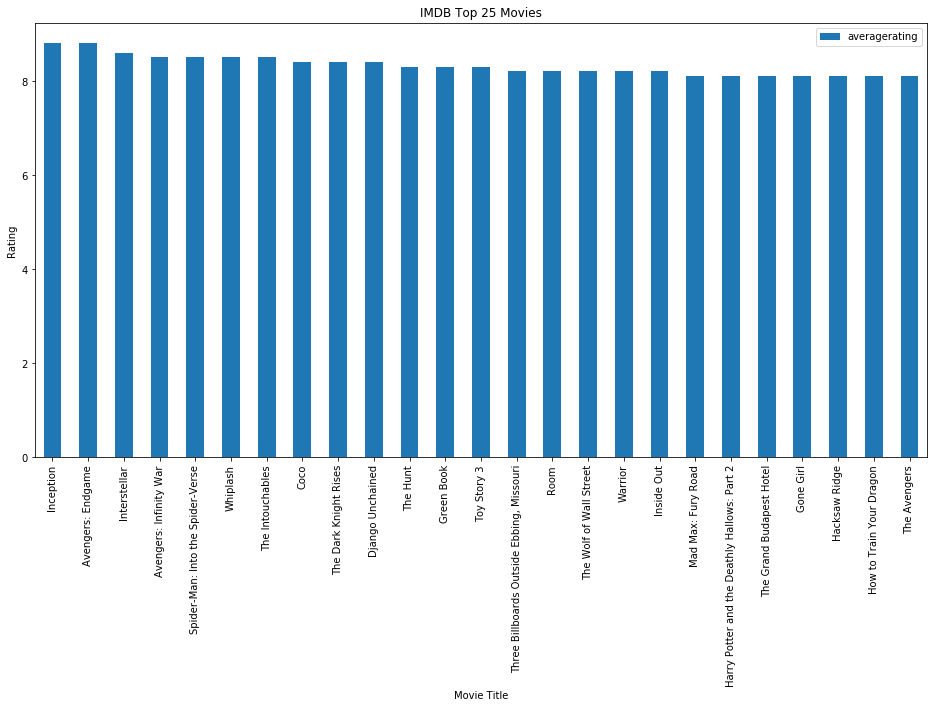

In [13]:
#Create a bar plot of the top 25 movies on IMDB that had more than 200,000 votes cast
imdb_top25_movies.plot.bar(x='primary_title', y='averagerating', figsize=(16,8))
plt.title('IMDB Top 25 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Rating')

The process was repeated on the TMDB data as it also contained information on movie rankings. By analyzing this data, it may then be compared to the IMDB data to see how the two are related.

In [14]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
#Check for duplicates in the tmdb database
duplicates_tmdb = tmdb_movies_df[tmdb_movies_df['title'].duplicated()]
print(len(duplicates_tmdb))

1829


In [16]:
#Sort the tmdb database by vote_count and drop the duplicate titles from the database
#and remove movies that received less than 1000 votes and then sort by the vote_average
#in descending order
tmdb_movies_df = tmdb_movies_df.sort_values('vote_count', ascending=False).drop_duplicates('title')
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_count'] > 1000]
tmdb_movies = tmdb_movies_df.sort_values(by='vote_average', ascending=False)
tmdb_top25_movies = tmdb_movies[:25]
tmdb_top25_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
17389,17389,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161
20626,20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
23861,23861,"[18, 36, 10752]",424,en,Schindler's List,25.334,1993-12-15,Schindler's List,8.5,8065
11031,11031,"[18, 10402]",244786,en,Whiplash,28.784,2014-10-10,Whiplash,8.4,7908
5201,5201,"[18, 80]",311,en,Once Upon a Time in America,17.717,1984-06-01,Once Upon a Time in America,8.4,2243


Text(0, 0.5, 'Rating')

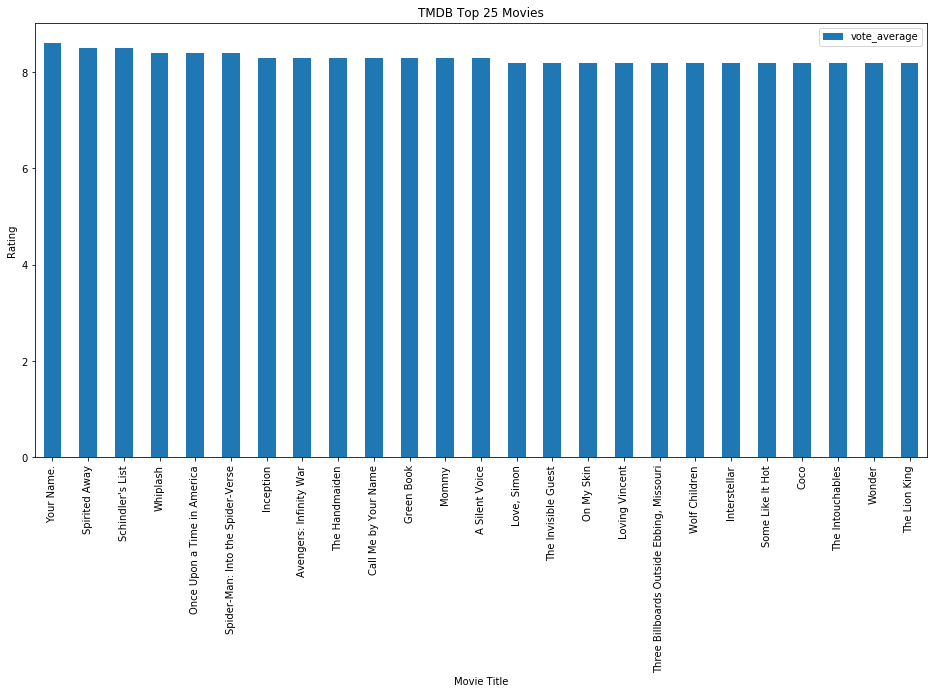

In [17]:
#Create a bar plot of the top 25 movies on TMDB
tmdb_top25_movies.plot.bar(x='title', y='vote_average', figsize=(16,8))
plt.title('TMDB Top 25 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Rating')

Now that a top 25 dataframe has been created for both the IMDB data and the TMDB data, the data can be be plotted next to each other to view how each dataframe compares to the other. This allows us to view how users vote differently depending on what host is conducting the voting process.

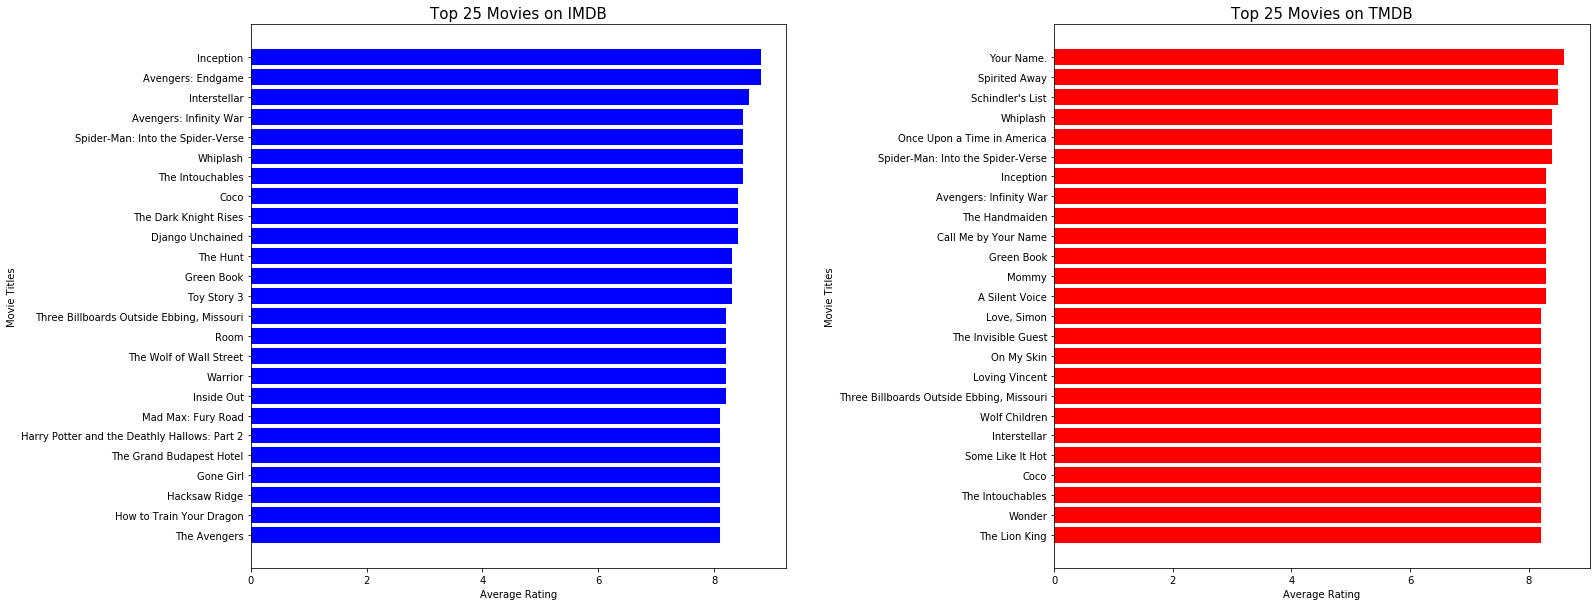

In [18]:
#Create subplots in order to compare the top 25 movies between IMDB and TMDB. A horizontal bar plot allows for
#easier comparison between the two plots
imdb_tmdb_plot = plt.figure(figsize=(24,10))
ax1 = imdb_tmdb_plot.add_subplot(121)
ax2 = imdb_tmdb_plot.add_subplot(122)
ax1.barh(imdb_top25_movies['primary_title'], imdb_top25_movies['averagerating'], color='blue')
ax2.barh(tmdb_top25_movies['title'], tmdb_top25_movies['vote_average'], color='red')
ax1.invert_yaxis(), ax2.invert_yaxis() #invert the y axis of each plot so the highest rated movie is at the top
ax1.set_title('Top 25 Movies on IMDB', fontdict={'fontsize':15}), ax2.set_title('Top 25 Movies on TMDB', fontdict={'fontsize':15})
ax1.set_ylabel('Movie Titles'), ax2.set_ylabel('Movie Titles')
ax1.set_xlabel('Average Rating'), ax2.set_xlabel('Average Rating')
plt.subplots_adjust(wspace=0.5) #increase the space between subplots to allow space for movie titles
plt.show()

| Question 1 Answer:
The subplots displayed above show that while the two databases contain some matching movie titles, the voting that took place on each website varies in terms of what the users thought were the best movies. Its clear that the movie titles that appear on both plots are more universally enjoyed, which will allow movie studios to understand what movies have the greatest appeal to the widest amount of viewers.

- Question 2: What are the top five highest earning movie studios and how do their earnings compare to one another over the years?

The next database to investigate was the BOM data. The dataframe consisted of movie studios and their earnings for each movie and the year the movie was released. The data was inspected in order to clean the dataframe in preparation for plotting information taken from it. All NaN values in numerical data columns were converted to 0 while categorical data columns were converted to N/A. A new column was also created to find the total gross earned by adding the domestic_gross and foreign_gross columns.

In [19]:
bom_movieGross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
bom_movieGross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
#Check for NaN values and return how many are found in each column
bom_movieGross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
#Replace missing values in the bom database with 0 to allow the data to be manipulated
bom_movieGross_df['domestic_gross'].fillna(0, inplace=True)
bom_movieGross_df['foreign_gross'] = bom_movieGross_df['foreign_gross'].str.replace(',','').astype(float) #drop commas and convert the data to float
bom_movieGross_df['foreign_gross'].fillna(0, inplace=True)
bom_movieGross_df['studio'].fillna('N/A', inplace=True)
bom_movieGross_df['total_gross'] = bom_movieGross_df.apply(lambda x: x.domestic_gross + x.foreign_gross, axis=1) #create new column with total gross earnings

In [24]:
#Recheck for null values to confirm they have all been removed
bom_movieGross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

In [25]:
#Recheck the info for the dataframe to confirm that all of the columns have the same amount
#of data and that the earnings columns are converted to float64
bom_movieGross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null float64
year              3387 non-null int64
total_gross       3387 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [26]:
#Find the top 5 highest earning studios
top_5_studio = bom_movieGross_df.groupby('studio').sum().sort_values('total_gross', ascending=False)[:5]
top_5_studio

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394535e+10,221575,2.240504e+10


The top 5 highest earning studios were found by totalling the newly created total_gross column and grouping the data by studio. These studios were then put into individual dataframes, grouping them by year so that the profits over the years the data was collected could be plotted. The 5 dataframes were then placed on a line plot to view how the top 5 studio earnings compared to each other between 2010 and 2018.

In [27]:
#Create a dataframe for each studio in the top 5 earners in order to plot each data set against each other
BV_studio = bom_movieGross_df[bom_movieGross_df['studio'] == 'BV']
BV_studio = BV_studio.groupby('year').sum().reset_index()
Fox_studio = bom_movieGross_df[bom_movieGross_df['studio'] == 'Fox']
Fox_studio = Fox_studio.groupby('year').sum().reset_index()
WB_studio = bom_movieGross_df[bom_movieGross_df['studio'] == 'WB']
WB_studio = WB_studio.groupby('year').sum().reset_index()
Uni_studio = bom_movieGross_df[bom_movieGross_df['studio'] == 'Uni.']
Uni_studio = Uni_studio.groupby('year').sum().reset_index()
Sony_studio = bom_movieGross_df[bom_movieGross_df['studio'] == 'Sony']
Sony_studio = Sony_studio.groupby('year').sum().reset_index()

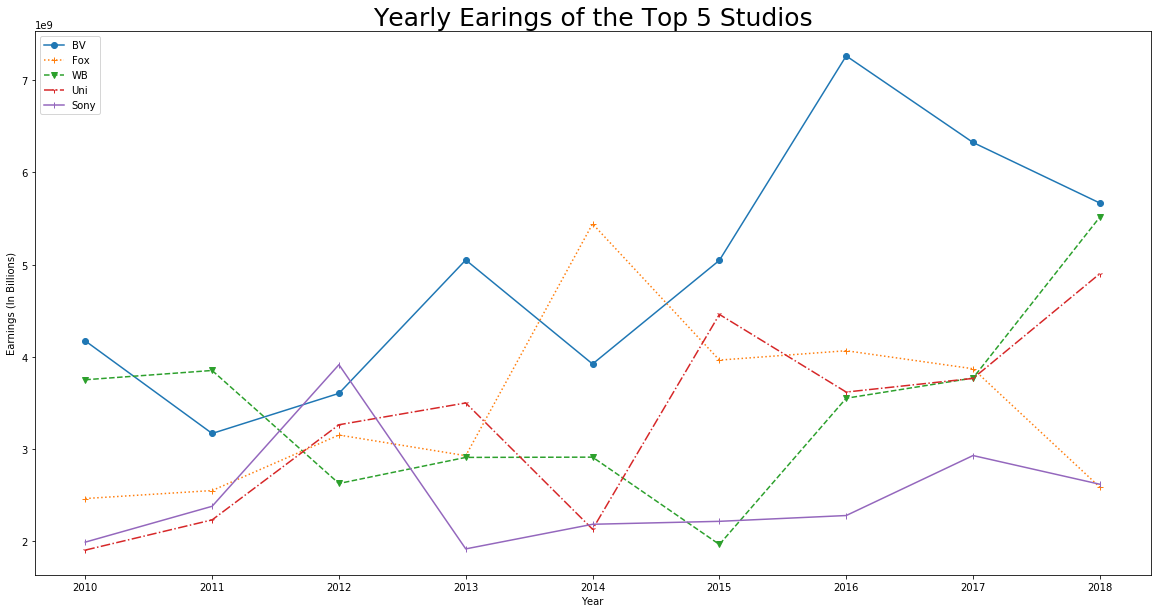

In [28]:
#Plot the earnings of the top 5 studios over each year to compare them to each other. Linestyle and
#markers were individualized in order to make the plot more easily read
plt.figure(figsize=(20,10))
plt.plot('year', 'total_gross', data=BV_studio, label='BV', linestyle='-', marker='o')
plt.plot('year', 'total_gross', data=Fox_studio, label='Fox', linestyle=':', marker='+')
plt.plot('year', 'total_gross', data=WB_studio, label='WB', linestyle='--', marker='v')
plt.plot('year', 'total_gross', data=Uni_studio, label='Uni', linestyle='-.', marker='1')
plt.plot('year', 'total_gross', data=Sony_studio, label='Sony', linestyle='-', marker='|')
plt.xlabel('Year')
plt.ylabel('Earnings (In Billions)')
plt.title('Yearly Earings of the Top 5 Studios', fontdict={'fontsize':25})
plt.legend(loc=2) #move the legend to the left side of the plot
plt.show()

| Question 2 Answer:
The top 5 highest earning movie studios between 2010 and 2018 were BV, Fox, WB, Universal, and Sony. Their earnings were plotted on a line graph in order to get a better visualization of how their profits compared to each other. The plot shows that BV has seen strong gains but those have begun to decrease in the past two years. Universal on the other had has continually grown to become a competitive movie studio. Fox and Sony have gone not seen much growth and may be on the decline as top 5 studios. WB has retained its spot as the second highest earner, although they took a hit to growth between 2011 and 2016. This data is useful to both investors looking for growing movie studios and producers who wish to see which studios to pitch their titles to, as negative growth studios would be less likely to take risks.

- Question 3:
Does the production budget of a movie have any influence on the worldwide earnigs of movies, or do the two not impact each other?

The final data that was investigated was the TN file consisting of movies budgets and earnings. Upon looking at the data, the budget and gross columns needed to be converted to numerical data in order for it to be plotted correctly. The production_budget was then plotted against the worldwide_gross earnings to view how the production budget influenced the earnings made from the movie globally.

In [29]:
tn_movieBudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
tn_movieBudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In order to convert the object data found in the production_budget, domestic_gross, and worldwide_gross columns, the commas and dollars signs had to be removeds as the symbols will not convert to float64. Once each column had the datatype altered, the info was called up to confirm that the data had been successfully changed.

In [31]:
tn_movieBudgets_df['production_budget'] = tn_movieBudgets_df['production_budget'].str.replace(',','').str.replace('$','').astype(float)
tn_movieBudgets_df['domestic_gross'] = tn_movieBudgets_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(float)
tn_movieBudgets_df['worldwide_gross'] = tn_movieBudgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(float)

In [32]:
#Recheck the info to confirm the datatype was converted to float64
tn_movieBudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Now that the data has been converted successfully, it can be plotted on a scatter plot to visually represent how the production budget of each film related to the worldwide gross earnings.

Text(0.5, 1.0, 'Worldwide Earnings Compared to Production Budget')

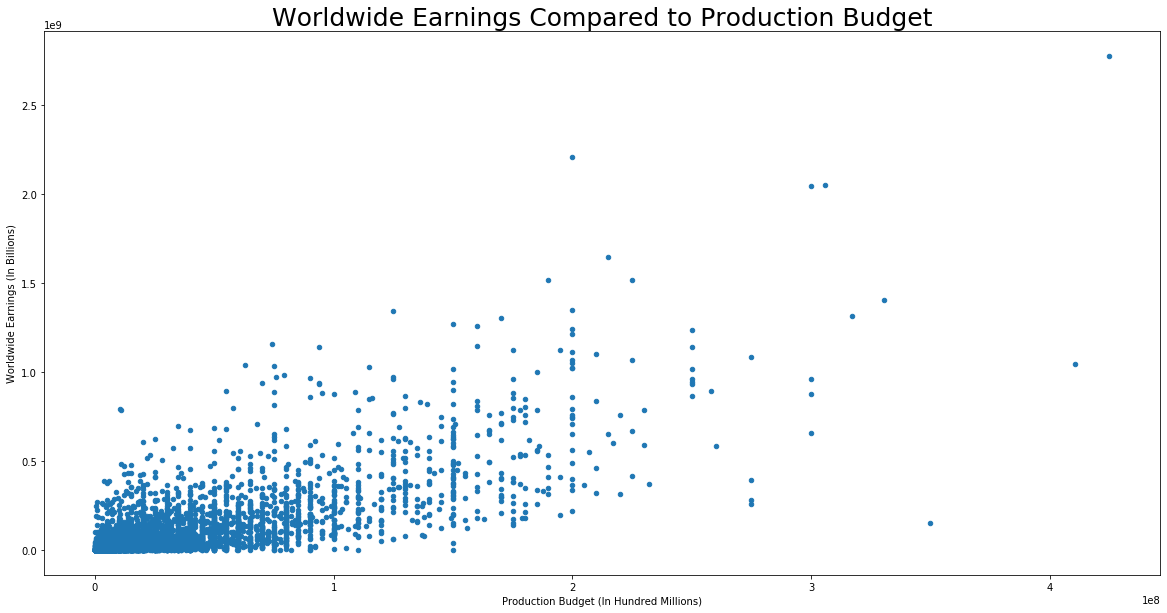

In [33]:
#Scatter plot to compare the production_budget to how much the movie earned
tn_movieBudgets_df.plot.scatter('production_budget', 'worldwide_gross', figsize=(20,10))
plt.xlabel('Production Budget (In Hundred Millions)'), plt.ylabel('Worldwide Earnings (In Billions)')
plt.title('Worldwide Earnings Compared to Production Budget', fontdict={'fontsize':25})

| Question 3 Answer:
The scatter plot above shows a positive trend, as the production budget of a film increases, the worldwide earnings of the film increases. This information will be helpful for movie studios in determining if budget increases for films are in their interest or not, and according to this plot it is beneficial. 